<a href="https://colab.research.google.com/github/EuphoricDas/Videoflo/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install apyori #insta;; apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5979 sha256=8e9004780794aeb1d983a3efc3c256ae92ae34bfa77913eb15fdb64068623161
  Stored in directory: c:\users\harsha\appdata\local\pip\cache\wheels\cb\f6\e1\57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
!pip install utils #install utils

In [ ]:
!pip install mlxtend #install mixtend

In [ ]:
#import required libraries
import warnings
warnings.filterwarnings("ignore")        
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import pandas as pd
import numpy as np
import seaborn as sns
from apyori import apriori
import utils
%matplotlib inline

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from pandas.plotting import parallel_coordinates

In [ ]:
#import the data
Google_data = pd.read_csv("Google_Store.csv")

In [ ]:
Google_data.head() #dispaly top 5

,Google Stylus Pen w/ LED Light,Google Rolltop Backpack Blue,Google Stylus Pen w/ LED Light.1,Google Stylus Pen w/ LED Light.2,Google Snapback Black Cap,Google Stylus Pen w/ LED Light.3,Google Stylus Pen w/ LED Light.4,Google Snapback Black Cap.1,Google Stylus Pen w/ LED Light.5,Google Stylus Pen w/ LED Light.6,Android Matrix Tee White,Google White Force 17 oz Bottle,Windup Android,YouTube 3 lines Tee Grey
0,False,True,False,False,False,False,False,True,False,False,False,False,False,False
1,True,True,True,True,False,True,True,False,True,True,True,True,True,False
2,False,False,False,False,True,False,False,False,False,False,True,False,False,False
3,True,False,True,True,True,True,True,False,True,True,False,True,True,False
4,True,False,True,True,False,True,True,False,True,True,False,False,False,False


In [ ]:
Google_data.describe() #describe the data

,Google Stylus Pen w/ LED Light,Google Rolltop Backpack Blue,Google Stylus Pen w/ LED Light.1,Google Stylus Pen w/ LED Light.2,Google Snapback Black Cap,Google Stylus Pen w/ LED Light.3,Google Stylus Pen w/ LED Light.4,Google Snapback Black Cap.1,Google Stylus Pen w/ LED Light.5,Google Stylus Pen w/ LED Light.6,Android Matrix Tee White,Google White Force 17 oz Bottle,Windup Android,YouTube 3 lines Tee Grey
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,536,812,541,547,728,546,546,695,542,540,613,630,678,569


<AxesSubplot:>

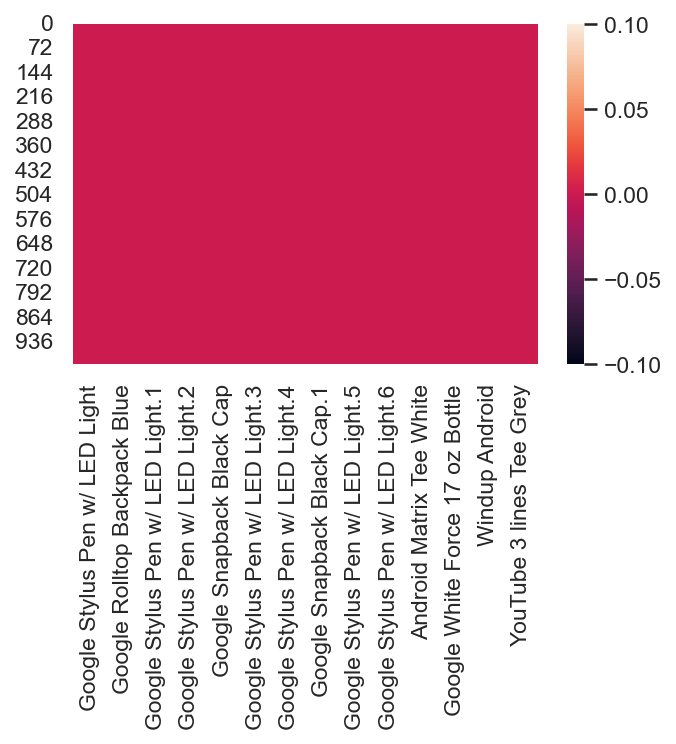

In [ ]:
#plot the data to find null values
plt.figure(figsize=(5,3),dpi=150)
sns.heatmap(Google_data.isnull())

<AxesSubplot:>

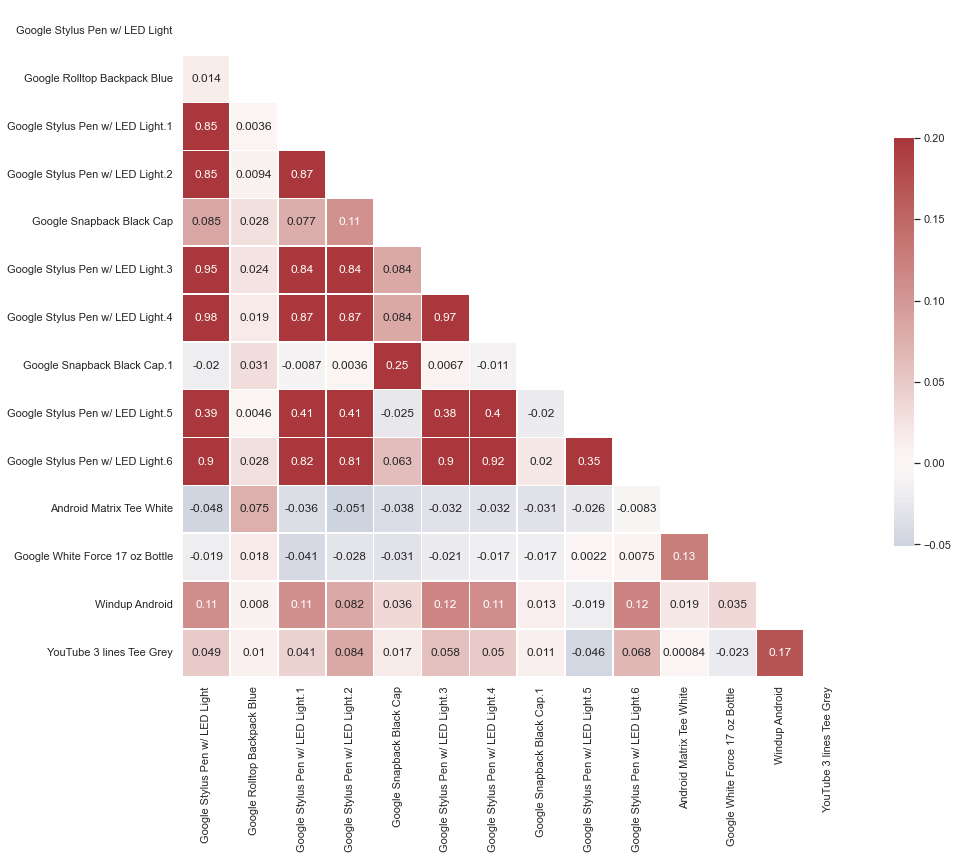

In [ ]:
sns.set_theme(style="white")


# Compute the correlation matrix
corr = Google_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="vlag", vmax=0.2, center=0,
            annot=True, square=True, linewidths=0.5, cbar_kws={"shrink": .5})

In [ ]:
# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(Google_data,
                            min_support = .006,
                            max_len = 3,
                            use_colnames = True)

In [ ]:
# Compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets,
                            metric = 'support',
                            min_threshold=0.1)

In [ ]:
#apply rules technique
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.2) &
                        (rules['lift'] > 1.0)]

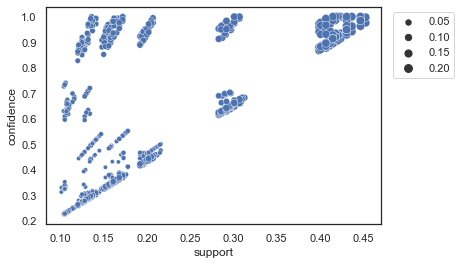

In [ ]:
# Generate scatterplot confidence versus support

sns.scatterplot(x = "support", y = "confidence", size= 'leverage',data = filtered_rules)
plt.legend(bbox_to_anchor= (1.02, 1), loc='upper left',)
plt.show()

In [ ]:
#dispaly confidence
filtered_rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
865,"(Google Stylus Pen w/ LED Light.5, Google Styl...",(Google Stylus Pen w/ LED Light.4),0.301,0.454,0.301,1.000000,2.202643,0.164346,inf
313,"(Google Stylus Pen w/ LED Light.6, Google Styl...",(Google Stylus Pen w/ LED Light),0.431,0.464,0.431,1.000000,2.155172,0.231016,inf
296,"(Google Stylus Pen w/ LED Light.3, Google Styl...",(Google Stylus Pen w/ LED Light),0.447,0.464,0.447,1.000000,2.155172,0.239592,inf
355,"(Google Stylus Pen w/ LED Light.6, Google Styl...",(Google Stylus Pen w/ LED Light),0.437,0.464,0.437,1.000000,2.155172,0.234232,inf
228,"(Google Stylus Pen w/ LED Light.2, Google Styl...",(Google Stylus Pen w/ LED Light.4),0.421,0.454,0.421,1.000000,2.202643,0.229866,inf
...,...,...,...,...,...,...,...,...,...
412,(Google Stylus Pen w/ LED Light.5),"(Windup Android, Google Stylus Pen w/ LED Light)",0.458,0.175,0.105,0.229258,1.310044,0.024850,1.070397
988,(Google Stylus Pen w/ LED Light.5),"(Windup Android, Google Stylus Pen w/ LED Ligh...",0.458,0.172,0.105,0.229258,1.332893,0.026224,1.074289
1036,(Google Stylus Pen w/ LED Light.6),"(Google Stylus Pen w/ LED Light.5, Windup Andr...",0.460,0.143,0.105,0.228261,1.596230,0.039220,1.110479
809,(Google Stylus Pen w/ LED Light.5),"(Google Stylus Pen w/ LED Light.2, Windup Andr...",0.458,0.165,0.104,0.227074,1.376207,0.028430,1.080311


In [ ]:
#display support
filtered_rules.sort_values('support',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(Google Stylus Pen w/ LED Light),(Google Stylus Pen w/ LED Light.4),0.464,0.454,0.453,0.976293,2.150425,0.242344,23.031273
9,(Google Stylus Pen w/ LED Light.4),(Google Stylus Pen w/ LED Light),0.454,0.464,0.453,0.997797,2.150425,0.242344,243.344000
7,(Google Stylus Pen w/ LED Light.3),(Google Stylus Pen w/ LED Light),0.454,0.464,0.447,0.984581,2.121943,0.236344,34.763429
297,(Google Stylus Pen w/ LED Light),"(Google Stylus Pen w/ LED Light.3, Google Styl...",0.464,0.447,0.447,0.963362,2.155172,0.239592,15.093647
295,"(Google Stylus Pen w/ LED Light, Google Stylus...",(Google Stylus Pen w/ LED Light.4),0.447,0.454,0.447,1.000000,2.202643,0.244062,inf
...,...,...,...,...,...,...,...,...,...
807,(Windup Android),"(Google Stylus Pen w/ LED Light.2, Google Styl...",0.322,0.310,0.104,0.322981,1.041875,0.004180,1.019174
806,"(Google Stylus Pen w/ LED Light.2, Google Styl...",(Windup Android),0.310,0.322,0.104,0.335484,1.041875,0.004180,1.020291
804,"(Google Stylus Pen w/ LED Light.2, Windup Andr...",(Google Stylus Pen w/ LED Light.5),0.165,0.458,0.104,0.630303,1.376207,0.028430,1.466066
117,(Google Snapback Black Cap.1),(Windup Android),0.305,0.322,0.101,0.331148,1.028409,0.002790,1.013676


In [ ]:
#display lift
filtered_rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
233,(Google Stylus Pen w/ LED Light.4),"(Google Stylus Pen w/ LED Light.2, Google Styl...",0.454,0.421,0.421,0.927313,2.202643,0.229866,7.965636
526,(Google Stylus Pen w/ LED Light.4),"(Google Stylus Pen w/ LED Light.1, Google Styl...",0.454,0.418,0.418,0.920705,2.202643,0.228228,7.339667
359,(Google Stylus Pen w/ LED Light.4),"(Google Stylus Pen w/ LED Light.6, Google Styl...",0.454,0.437,0.437,0.962555,2.202643,0.238602,15.035412
173,(Google Stylus Pen w/ LED Light.4),"(Google Stylus Pen w/ LED Light.1, Google Styl...",0.454,0.424,0.424,0.933921,2.202643,0.231504,8.716800
228,"(Google Stylus Pen w/ LED Light.2, Google Styl...",(Google Stylus Pen w/ LED Light.4),0.421,0.454,0.421,1.000000,2.202643,0.229866,inf
...,...,...,...,...,...,...,...,...,...
812,"(Google Stylus Pen w/ LED Light.2, Google Styl...",(YouTube 3 lines Tee Grey),0.310,0.431,0.134,0.432258,1.002919,0.000390,1.002216
824,"(Google Stylus Pen w/ LED Light.6, Google Styl...",(Google White Force 17 oz Bottle),0.410,0.370,0.152,0.370732,1.001978,0.000300,1.001163
825,(Google White Force 17 oz Bottle),"(Google Stylus Pen w/ LED Light.6, Google Styl...",0.370,0.410,0.152,0.410811,1.001978,0.000300,1.001376
142,(YouTube 3 lines Tee Grey),(Android Matrix Tee White),0.431,0.387,0.167,0.387471,1.001217,0.000203,1.000769


In [ ]:
#again apply rules
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.45) &
                        (rules['lift'] > 1.0)]

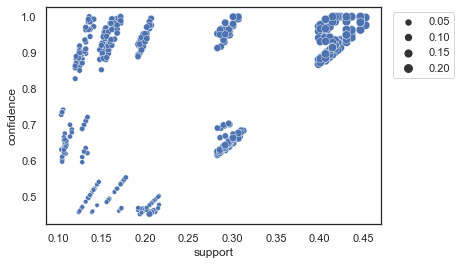

In [ ]:
#plot the data 
sns.scatterplot(x = "support", y = "confidence", size= 'leverage',data = filtered_rules)
plt.legend(bbox_to_anchor= (1.02, 1), loc='upper left',)
plt.show()

In [ ]:
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.45) &
                        (rules['lift'] > 1.0)&
                        (rules['support']>0.195)]

In [ ]:
#display fittered data
filtered_rules 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Google Stylus Pen w/ LED Light.1),(Google Stylus Pen w/ LED Light),0.459,0.464,0.424,0.923747,1.990835,0.211024,7.029257
1,(Google Stylus Pen w/ LED Light),(Google Stylus Pen w/ LED Light.1),0.464,0.459,0.424,0.913793,1.990835,0.211024,6.275600
2,(Google Stylus Pen w/ LED Light.2),(Google Stylus Pen w/ LED Light),0.453,0.464,0.421,0.929360,2.002931,0.210808,7.587750
3,(Google Stylus Pen w/ LED Light),(Google Stylus Pen w/ LED Light.2),0.464,0.453,0.421,0.907328,2.002931,0.210808,5.902512
6,(Google Stylus Pen w/ LED Light),(Google Stylus Pen w/ LED Light.3),0.464,0.454,0.447,0.963362,2.121943,0.236344,14.902588
...,...,...,...,...,...,...,...,...,...
971,(Google Stylus Pen w/ LED Light.4),"(Google Stylus Pen w/ LED Light.6, Google Styl...",0.454,0.297,0.292,0.643172,2.165562,0.157162,1.970136
1014,"(YouTube 3 lines Tee Grey, Google Stylus Pen w...",(Google Stylus Pen w/ LED Light.4),0.215,0.454,0.202,0.939535,2.069460,0.104390,9.030000
1015,"(YouTube 3 lines Tee Grey, Google Stylus Pen w...",(Google Stylus Pen w/ LED Light.6),0.208,0.460,0.202,0.971154,2.111204,0.106320,18.720000
1016,"(Google Stylus Pen w/ LED Light.6, Google Styl...",(YouTube 3 lines Tee Grey),0.437,0.431,0.202,0.462243,1.072489,0.013653,1.058098


In [ ]:
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

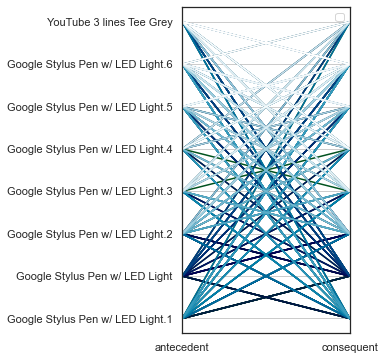

In [ ]:
#plot final data to find relationship
coords = rules_to_coordinates(filtered_rules)
plt.figure(figsize=(3,6))
parallel_coordinates(coords, 'rule',colormap = 'ocean')
plt.legend([])
plt.show()